# One-year Trend Analysis

This notebook shows the trend analysis of the EUR/USD currency pair on the one hour time frame over the period of one year, specifically from 01/01/2019 to 01/01/2020, with the objective of establishing how many trends there were and the percentage of each.

The crossing and positions of 3 simple moving averages - the first of 7 periods, the second of 20 periods and the third of 65 periods - will determine if the price is trending and what type of trend will be.

**Conditions**

* If the 7-period SMA is positioned above the 20-period SMA and the 20-period SMA above the 65-period SMA, it is consider an **uptrend**.
* If the 65-period SMA is above the 20-period SMA and the 20-period SMA is above the 7-period SMA, it is consider a **downtrend**.
* If neither of the 2 previous conditions is met, the price is in a **range**.

Data source: [Kaggle](https://www.kaggle.com/datasets/maxwells/eurusd-m15?select=EURUSD_60.csv)

## Preparing the tools

Pandas, Matplotlib, Plotly and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default="svg"
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

## Import data

As mentioned above, the dataset was retrieved from Kaggle. https://www.kaggle.com/datasets/maxwells/eurusd-m15?select=EURUSD_60.csv, downloaded in csv format and then imported into the project.

In [2]:
df = pd.read_csv("EURUSD_60.csv")

df

,time,open,high,low,close
0,1999-12-31 16:00:00,1.00830,1.00870,1.00720,1.00740
1,1999-12-31 17:00:00,1.00740,1.00830,1.00630,1.00690
2,1999-12-31 18:00:00,1.00700,1.00750,1.00470,1.00630
3,1999-12-31 19:00:00,1.01030,1.01030,1.00840,1.00870
4,1999-12-31 20:00:00,1.00880,1.01050,1.00870,1.00960
...,...,...,...,...,...
133150,2021-06-15 12:00:00,1.21304,1.21306,1.21207,1.21236
133151,2021-06-15 13:00:00,1.21234,1.21274,1.21131,1.21183
133152,2021-06-15 14:00:00,1.21184,1.21208,1.21059,1.21071
133153,2021-06-15 15:00:00,1.21070,1.21187,1.21014,1.21117


### Reorganisation of data

In [3]:
# Check the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133155 entries, 0 to 133154
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    133155 non-null  object 
 1   open    133155 non-null  float64
 2   high    133155 non-null  float64
 3   low     133155 non-null  float64
 4   close   133155 non-null  float64
dtypes: float64(4), object(1)
memory usage: 5.1+ MB


In [4]:
# Check the shape (number of rows and columns) of the DataFrame
df.shape

(133155, 5)

In [5]:
# Check the columns names
df.columns

Index(['time', 'open', 'high', 'low', 'close'], dtype='object')

### Select only data for the time period from 24/12/2018 to 01/01/2020

This selection is made to work with the dataset from 01/01/2019 to 01/01/2020 only, and thus use this data to calculate 3 simple moving averages and determine the trend and its type, if any. 

In [6]:
# The selection starts 1 week before 01/01/2019, to have the values of the 3 simple moving averages from the time 00:00:00 of 01/01/2019.
mask = (df["time"] > "2018-12-24 00:00:00") & (df["time"] <= "2020-01-01 23:00:00")
df.loc[mask]
df2 = df.loc[mask]
df2

,time,open,high,low,close
117796,2018-12-24 01:00:00,1.13678,1.13738,1.13649,1.13723
117797,2018-12-24 02:00:00,1.13723,1.13806,1.13706,1.13782
117798,2018-12-24 03:00:00,1.13782,1.13813,1.13768,1.13802
117799,2018-12-24 04:00:00,1.13803,1.13905,1.13777,1.13877
117800,2018-12-24 05:00:00,1.13877,1.13918,1.13851,1.13896
...,...,...,...,...,...
124116,2019-12-31 16:00:00,1.12381,1.12392,1.12181,1.12204
124117,2019-12-31 17:00:00,1.12200,1.12328,1.12172,1.12238
124118,2019-12-31 18:00:00,1.12237,1.12313,1.12162,1.12264
124119,2019-12-31 19:00:00,1.12265,1.12294,1.12229,1.12290


### Calculation of the 3 simple moving averages and addition to the DataFrame

* 7 periods Simple Moving Average
* 20 periods Simple Moving Average
* 65 periods Simple Moving Average

In [7]:
# Calculation of the simple moving average of 7 periods
df2["SMA7"] = df2.close.rolling(7).mean()
df2["SMA7"]

117796         NaN
117797         NaN
117798         NaN
117799         NaN
117800         NaN
            ...   
124116    1.122286
124117    1.122451
124118    1.122634
124119    1.122800
124120    1.122736
Name: SMA7, Length: 6325, dtype: float64

In [8]:
# Calculation of the simple moving average of 20 periods
df2["SMA20"] = df2.close.rolling(20).mean()
df2["SMA20"]

117796         NaN
117797         NaN
117798         NaN
117799         NaN
117800         NaN
            ...   
124116    1.121059
124117    1.121169
124118    1.121309
124119    1.121458
124120    1.121576
Name: SMA20, Length: 6325, dtype: float64

In [9]:
# Calculation of the simple moving average of 65 periods
df2["SMA65"] = df2.close.rolling(65).mean()
df2["SMA65"]

117796         NaN
117797         NaN
117798         NaN
117799         NaN
117800         NaN
            ...   
124116    1.118094
124117    1.118292
124118    1.118484
124119    1.118680
124120    1.118856
Name: SMA65, Length: 6325, dtype: float64

### Select only data for the time period from 01/01/2019 to 01/01/2020 to determine the trend

Now with the simple moving average values added to the DataFrame, the data is selected to remove that extra week at the end of 2018 so that it does not appear in the new DataFrame.

In [10]:
mask1 = (df2["time"] > "2019-01-01 00:00:00") & (df2["time"] <= "2020-01-01 23:00:00")
df2.loc[mask1]
df3 = df2.loc[mask1]
df3

,time,open,high,low,close,SMA7,SMA20,SMA65
117911,2019-01-02 00:00:00,1.14630,1.14644,1.14597,1.14609,1.144666,1.144170,1.143469
117912,2019-01-02 01:00:00,1.14622,1.14679,1.14558,1.14611,1.145036,1.144282,1.143586
117913,2019-01-02 02:00:00,1.14611,1.14626,1.14544,1.14561,1.145353,1.144385,1.143699
117914,2019-01-02 03:00:00,1.14561,1.14562,1.14458,1.14522,1.145316,1.144454,1.143804
117915,2019-01-02 04:00:00,1.14522,1.14534,1.14427,1.14457,1.145231,1.144570,1.143907
...,...,...,...,...,...,...,...,...
124116,2019-12-31 16:00:00,1.12381,1.12392,1.12181,1.12204,1.122286,1.121059,1.118094
124117,2019-12-31 17:00:00,1.12200,1.12328,1.12172,1.12238,1.122451,1.121169,1.118292
124118,2019-12-31 18:00:00,1.12237,1.12313,1.12162,1.12264,1.122634,1.121309,1.118484
124119,2019-12-31 19:00:00,1.12265,1.12294,1.12229,1.12290,1.122800,1.121458,1.118680


In [11]:
# Calculation of the trend and creation of a new column with the value 
trend = []
for index, row in df3.iterrows():
    if row["SMA7"] > row["SMA20"] and row["SMA20"] > row["SMA65"]:
        trend.append("uptrend")
    elif row["SMA7"] < row["SMA20"] and row["SMA20"] < row["SMA65"]:
        trend.append("downtrend")
    else:
        trend.append("range")
        
df3["trend"] = trend

In [12]:
df3

,time,open,high,low,close,SMA7,SMA20,SMA65,trend
117911,2019-01-02 00:00:00,1.14630,1.14644,1.14597,1.14609,1.144666,1.144170,1.143469,uptrend
117912,2019-01-02 01:00:00,1.14622,1.14679,1.14558,1.14611,1.145036,1.144282,1.143586,uptrend
117913,2019-01-02 02:00:00,1.14611,1.14626,1.14544,1.14561,1.145353,1.144385,1.143699,uptrend
117914,2019-01-02 03:00:00,1.14561,1.14562,1.14458,1.14522,1.145316,1.144454,1.143804,uptrend
117915,2019-01-02 04:00:00,1.14522,1.14534,1.14427,1.14457,1.145231,1.144570,1.143907,uptrend
...,...,...,...,...,...,...,...,...,...
124116,2019-12-31 16:00:00,1.12381,1.12392,1.12181,1.12204,1.122286,1.121059,1.118094,uptrend
124117,2019-12-31 17:00:00,1.12200,1.12328,1.12172,1.12238,1.122451,1.121169,1.118292,uptrend
124118,2019-12-31 18:00:00,1.12237,1.12313,1.12162,1.12264,1.122634,1.121309,1.118484,uptrend
124119,2019-12-31 19:00:00,1.12265,1.12294,1.12229,1.12290,1.122800,1.121458,1.118680,uptrend


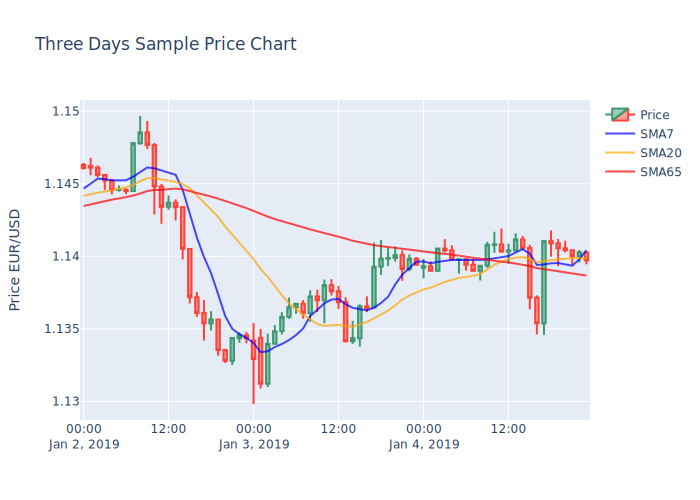

In [13]:
# Creation of a candlestick chart with the 3 moving averages of the first three days
three_days = df3.head(72)

fig = go.Figure(data=[go.Candlestick(x=three_days["time"],
                                    open=three_days["open"],
                                    high=three_days["high"],
                                    low=three_days["low"],
                                    close=three_days["close"], 
                                    name="Price")]) 
                      
fig.update_layout(
    title="Three Days Sample Price Chart",
    yaxis_title="Price EUR/USD", 
    xaxis_rangeslider_visible=False)
fig.update_xaxes(
    rangebreaks=[dict(bounds=["sat", "mon"])])
fig.add_trace(go.Scatter(x=three_days["time"], 
                         y=three_days["SMA7"], 
                         opacity=0.7, 
                         line=dict(color='blue', width=2), 
                         name='SMA7'))
fig.add_trace(go.Scatter(x=three_days["time"], 
                         y=three_days["SMA20"], 
                         opacity=0.7, 
                         line=dict(color='orange', width=2), 
                         name='SMA20'))
fig.add_trace(go.Scatter(x=three_days["time"], 
                         y=three_days["SMA65"], 
                         opacity=0.7, 
                         line=dict(color='red', width=2), 
                         name='SMA65'))

fig.show()

As shown in the chart, on January 2nd at 14:00 the 3 moving averages cross, then the 65 SMA is above the 20 SMA and the 20 SMA is above the 7 SMA, indicating a downtrend.
The next day, on January 3rd at 8:00, we see that the 7 SMA is above the 20 SMA, but both are still below the 65 SMA, indicating a period of range.

## Percentage of uptrends, downtrends and range in 1 year

Having determined the moving averages and the market trend conditions, the next step is to calculate the percentage of each type of trend in one year timespan.

To do this, a pie chart is created based on the "trend" column of the DataFrames. 

In [14]:
# 1st the type of the "trend" column needs to be known, as numerical values are required to be able to plot the graph.
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6210 entries, 117911 to 124120
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    6210 non-null   object 
 1   open    6210 non-null   float64
 2   high    6210 non-null   float64
 3   low     6210 non-null   float64
 4   close   6210 non-null   float64
 5   SMA7    6210 non-null   float64
 6   SMA20   6210 non-null   float64
 7   SMA65   6210 non-null   float64
 8   trend   6210 non-null   object 
dtypes: float64(7), object(2)
memory usage: 485.2+ KB


As can be seen, the dtype of the "trend" column is an object, since the values are strings. To transform them into numerical values converting them into categorical values is needed.

In [15]:
# Tranform into categorical values
df3["trend"] = df3["trend"].astype('category')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6210 entries, 117911 to 124120
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   time    6210 non-null   object  
 1   open    6210 non-null   float64 
 2   high    6210 non-null   float64 
 3   low     6210 non-null   float64 
 4   close   6210 non-null   float64 
 5   SMA7    6210 non-null   float64 
 6   SMA20   6210 non-null   float64 
 7   SMA65   6210 non-null   float64 
 8   trend   6210 non-null   category
dtypes: category(1), float64(7), object(1)
memory usage: 442.8+ KB


In [16]:
# Convert 'trend' column values into numeric and create a new column
df3["categorical trend"] = pd.factorize(df3["trend"])[0]
df3.head(50)

,time,open,high,low,close,SMA7,SMA20,SMA65,trend,categorical trend
117911,2019-01-02 00:00:00,1.14630,1.14644,1.14597,1.14609,1.144666,1.144170,1.143469,uptrend,0
117912,2019-01-02 01:00:00,1.14622,1.14679,1.14558,1.14611,1.145036,1.144282,1.143586,uptrend,0
117913,2019-01-02 02:00:00,1.14611,1.14626,1.14544,1.14561,1.145353,1.144385,1.143699,uptrend,0
117914,2019-01-02 03:00:00,1.14561,1.14562,1.14458,1.14522,1.145316,1.144454,1.143804,uptrend,0
117915,2019-01-02 04:00:00,1.14522,1.14534,1.14427,1.14457,1.145231,1.144570,1.143907,uptrend,0
117916,2019-01-02 05:00:00,1.14457,1.14488,1.14446,1.14458,1.145237,1.144656,1.143988,uptrend,0
117917,2019-01-02 06:00:00,1.14457,1.14470,1.14428,1.14450,1.145240,1.144746,1.144066,uptrend,0
117918,2019-01-02 07:00:00,1.14450,1.14789,1.14450,1.14779,1.145483,1.144919,1.144182,uptrend,0
117919,2019-01-02 08:00:00,1.14779,1.14967,1.14769,1.14854,1.145830,1.145183,1.144330,uptrend,0
117920,2019-01-02 09:00:00,1.14854,1.14932,1.14739,1.14767,1.146124,1.145385,1.144497,uptrend,0


A new column called "categorical trend" has been created and these values will be used for the pie chart, but first the value 0 must be replaced as it is recognised as null when creating the chart.

In [17]:
# Replace the 0 value with the number 3
cat_col = df3["categorical trend"]
cat_col.replace(to_replace = 0, value = 3, inplace=True)
df3

,time,open,high,low,close,SMA7,SMA20,SMA65,trend,categorical trend
117911,2019-01-02 00:00:00,1.14630,1.14644,1.14597,1.14609,1.144666,1.144170,1.143469,uptrend,3
117912,2019-01-02 01:00:00,1.14622,1.14679,1.14558,1.14611,1.145036,1.144282,1.143586,uptrend,3
117913,2019-01-02 02:00:00,1.14611,1.14626,1.14544,1.14561,1.145353,1.144385,1.143699,uptrend,3
117914,2019-01-02 03:00:00,1.14561,1.14562,1.14458,1.14522,1.145316,1.144454,1.143804,uptrend,3
117915,2019-01-02 04:00:00,1.14522,1.14534,1.14427,1.14457,1.145231,1.144570,1.143907,uptrend,3
...,...,...,...,...,...,...,...,...,...,...
124116,2019-12-31 16:00:00,1.12381,1.12392,1.12181,1.12204,1.122286,1.121059,1.118094,uptrend,3
124117,2019-12-31 17:00:00,1.12200,1.12328,1.12172,1.12238,1.122451,1.121169,1.118292,uptrend,3
124118,2019-12-31 18:00:00,1.12237,1.12313,1.12162,1.12264,1.122634,1.121309,1.118484,uptrend,3
124119,2019-12-31 19:00:00,1.12265,1.12294,1.12229,1.12290,1.122800,1.121458,1.118680,uptrend,3


## Plot the pie chart

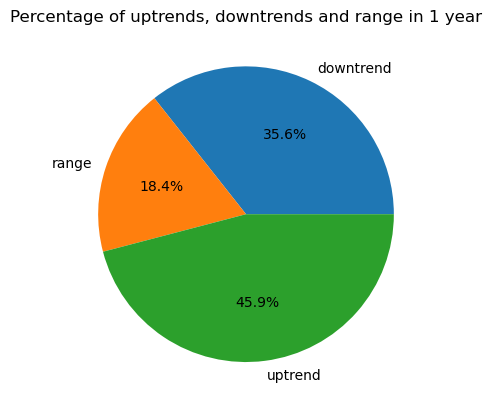

In [18]:
df3.groupby(['trend']).sum().plot(kind='pie', y='categorical trend', autopct='%1.1f%%')
plt.legend("", frameon=False)
plt.title("Percentage of uptrends, downtrends and range in 1 year")
plt.ylabel("");

# Conclusions 

As the graph shows, in the period from 01/01/2019 to 01/01/2020, according to the position of the moving averages, the market was mostly in trend, 81.6% of the year and only 18.4% remained in range.
Of the total time in trend, 45.9% was in an uptrend, and 35.6% was in a downtrend, showing that a trend-following investment strategy could be more useful when trading this market. However, this simplified analysis based only on the moving average position would be more accurate if complemented with other indicators and a fundamental analysis of the market situation in order to find more precise conclusions before attempting an investment strategy.